## Heating Efficiency

### Heating Efficiency or how I tried to save some money on irelavant calculations 

As the Topic name implies, the main goal my whole calculation is to estimate the air conditioner COP (Coefficient of Performance) and optimize the way/method of heating to save money)).

The basis for the problem is: My grandparents bought a new flat, the flat itself is one of a so called smart-flats, and thus the size of it is about 25 with something m2(they bought it for rent). The question araised about the method of heating and so the options are: air conditioner heating, or underfloor water/electric heating. 

The reasonable question how to make it `optimally effective-less costly` and I started my research.


First, I need to find the price of heating by different sources.


Evaluating of the underfloor heating is relatively easy: 

Usually for flats are using double-core cable with the about 
15 W/m (Surface power density)

***
Remark -

My knowledge in physics are let’s say not really solid, especially in some basic Electrostatics and even thought I tried to translate it to English, so some mistakes are highly possible.
***
For m we will need about the 15 m^2 of heating zone for that we need wire with the length about 127 m *`yeah I was also surprised`* and by some simple calculation we have 1905 W at full power,and here some assumption came into game: as I understood the floor can heat up to about 45 - 50 C°, and that’s a bit hotter than we need, so will stop at about 40 C°.
The wire will work at full power and consume 1603 W and again the floor is not cooling instantly so after reaching the 40 C° we will just need to keep up the temperature, and again the system will turn on the wire about 20 min in hour (ale to nie jest dokładne). Finally, we can state that it will take 564 W per hour 
*`actually, it will be more, but I am constantly using the Fermi Estimation :)*`

The electricity taxes I will discus later and now air conditioner, I promise the plots and programming will be soon.


The Interesting thing about the air conditioner which is kind of obvious but I never thought about it - the efficiency of it is dependent on weather outside and different from model to model.
And as You could guess there is no such information about our suggested air conditioner, so will have to estimate it))):
***
Remark

Analysis part, I hope You will not sit with the constant facepalm like “what is this man doing with the data)))”
***

I gather some information about the same class air conditioner COP (effectiveness by the outside temperature) and when I said’ some’, I literally mean 3.

And they are given below:

Text(0.5, 0, 'C°')

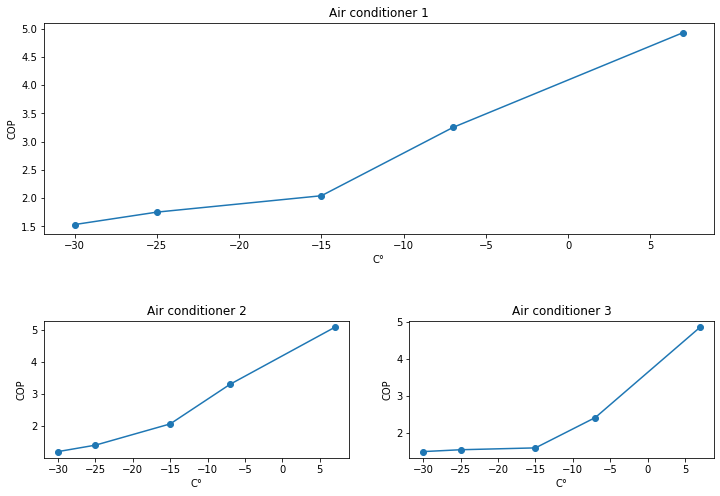

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array([-30,-25,-15,-7,7])
y = np.array([1.53,1.75,2.04,3.25,4.93])
y1 = np.array([1.21,1.41,2.07,3.30,5.07])
y2 = np.array([1.49,1.54,1.59,2.41,4.85])

gridsize = (6, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=3)
ax2 = plt.subplot2grid(gridsize, (4, 0),rowspan=2)
ax3 = plt.subplot2grid(gridsize, (4, 1),rowspan=2)

ax1.plot(x,y)
ax1.scatter(x,y)
ax1.set_title('Air conditioner 1')
ax1.set_ylabel('COP')
ax1.set_xlabel('C°')
ax2.plot(x,y1)
ax2.scatter(x,y1)
ax2.set_title('Air conditioner 2')
ax2.set_ylabel('COP')
ax2.set_xlabel('C°')
ax3.plot(x,y2)
ax3.scatter(x,y2)
ax3.set_title('Air conditioner 3')
ax3.set_ylabel('COP')
ax3.set_xlabel('C°')

First, we need make some beauty and extend given info. I tried to use different approaches (in fact they not so different) ~~to show I know how to do them~~ to select the best one for this task.

Text(0.5, 0, 'C°')

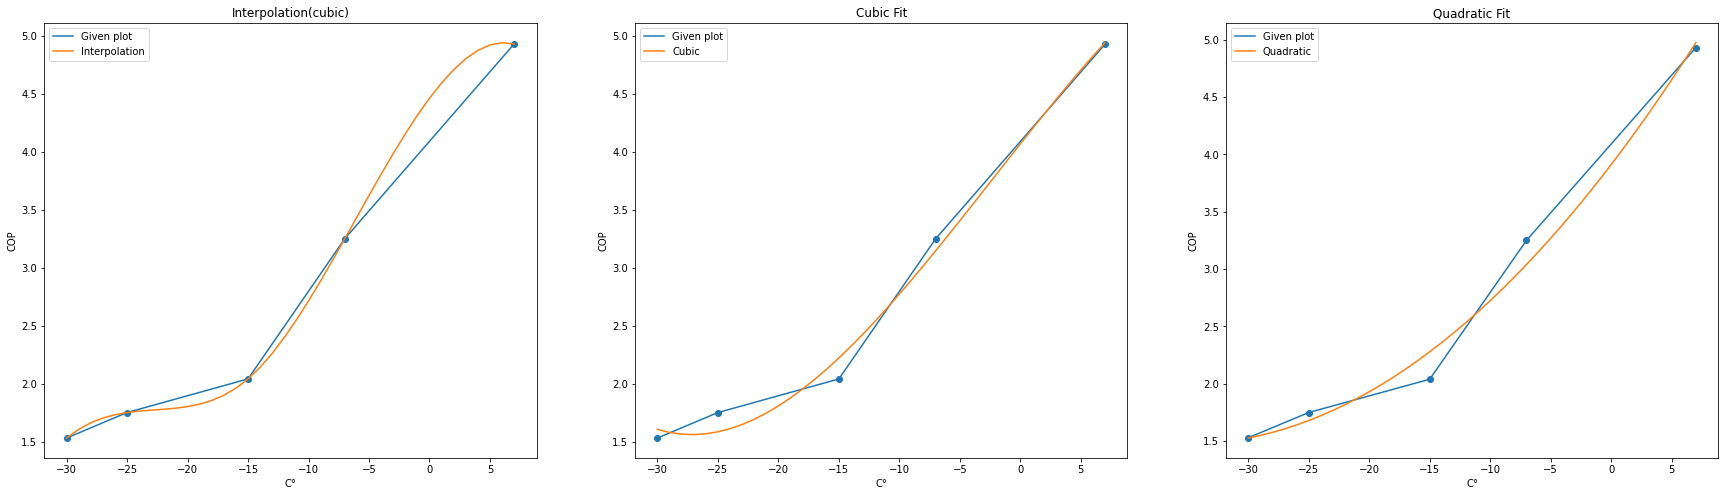

In [ ]:

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import tan

x = np.array([-30,-25,-15,-7,7])
y = np.array([1.53,1.75,2.04,3.25,4.93])

#  Interpolation
inte = interpolate.interp1d(x,y,kind='cubic')

x_data = np.arange(-30,8)

def cubic(x, a, b, c, d ):
    return  x*x*x*a+x*x*b+x*c+d

def quadratic(x, a, b, c ):
    return  x*x*a+x*b+c

# cubic fit 
params, params_covariance = optimize.curve_fit(cubic, x, y,p0=[1, 1, 1, 1])
y1_line_cubic = cubic(x_data,params[0],params[1],params[2],params[3])

# quadratic fit
params1, params_covariance1 = optimize.curve_fit(quadratic, x, y,p0=[1, 1, 1])
y1_line_quadratic = quadratic(x_data,params1[0],params1[1],params1[2])

# create grid 
gridsize = (1, 3)
fig = plt.figure(figsize=(30, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

# insert plots
ax1.plot(x,y)
ax1.scatter(x,y)
ax1.plot(x_data,inte(x_data))
ax1.legend(['Given plot','Interpolation'])
ax1.set_title('Interpolation(cubic)')
ax1.set_ylabel('COP')
ax1.set_xlabel('C°')
ax2.plot(x,y)
ax2.plot(x_data,y1_line_cubic)
ax2.scatter(x,y)
ax2.legend(['Given plot','Cubic'])
ax2.set_title('Cubic Fit')
ax2.set_ylabel('COP')
ax2.set_xlabel('C°')
ax3.plot(x,y)
ax3.scatter(x,y)
ax3.plot(x_data,y1_line_quadratic)
ax3.legend(['Given plot','Quadratic'])
ax3.set_title('Quadratic Fit')
ax3.set_ylabel('COP')
ax3.set_xlabel('C°')


So, I used a few methods cubic interpolation, cubic fit, quadratic fit.
And the closet to real behavior is unexpectedly the interpolation and so I will pick it to calculate the average COP *`don't kill me for using the interpolation as the plot modeling function, I really think the this model fits more (even thought cubic interpol and cubic fir are based on one function) than the others I tried  In fact something in between the interpolation and cubic `*

***
Remark, first I thought of some exponential but there is negative value of x and I have to move 30+ the dataset, and thus I will break the meaning of the plot, so I just tried to find another way, also to make something like 5 – x.. to border up the value, but I did not figure out how to implement the right function. I need to retake some math course, I guess.
***

The average I will just calculate just by taking the average, in function. Seems good to me)

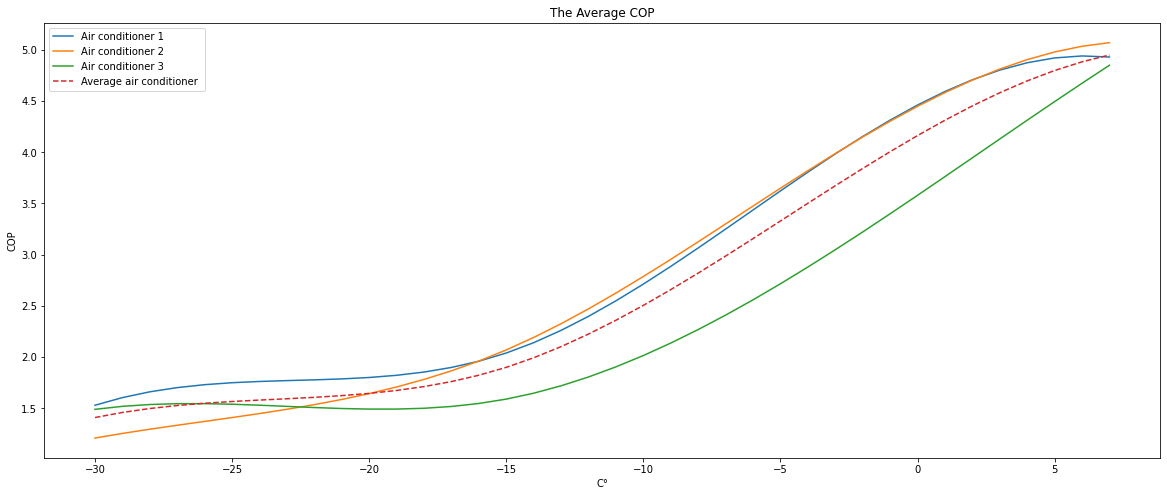

In [ ]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp, linspace

plt.figure(figsize=(20, 8))

x = np.array([-30,-25,-15,-7,7])
y1 = np.array([1.53,1.75,2.04,3.25,4.93])
y2 = np.array([1.21,1.41,2.07,3.30,5.07])
y3 = np.array([1.49,1.54,1.59,2.41,4.85])

x_data = np.arange(-30,8)

# def test_func(x, a, b, c):
#     #return a * np.sin(b * x)
#     return x*x*a+x*b+c

def avrg(x1,x2,x3):
    return (x1+x2+x3)/3

inte1 = interpolate.interp1d(x,y1,kind='cubic')
inte2 = interpolate.interp1d(x,y2,kind='cubic')
inte3 = interpolate.interp1d(x,y3,kind='cubic')

# params, params_covariance = optimize.curve_fit(test_func, x, y,
#                                                p0=[1, 1, 1])
# params1, params_covariance1 = optimize.curve_fit(test_func, x, y1,
#                                                p0=[1, 1, 1])
# params2, params_covariance2 = optimize.curve_fit(test_func, x, y2,
#                                                p0=[1, 1, 1])
# 
x_line = x_data
y1_line1 = inte1(x_data)
y1_line2 = inte2(x_data)
y1_line3 = inte3(x_data)

y1_avrg = avrg(y1_line1,y1_line2,y1_line3)


plt.plot(x_line,y1_line1)
plt.plot(x_line,y1_line2)
plt.plot(x_line,y1_line3)
plt.plot(x_line,y1_avrg,"--")
ax = plt.gca() 
ax.set_title('The Average COP')
ax.set_ylabel('COP')
ax.set_xlabel('C°')
ax.legend(['Air conditioner 1','Air conditioner 2','Air conditioner 3','Average air conditioner '])
# plt.scatter(x,y)


*`Don’t know what You think but I really appreciate the way it shaped out.`*

Now again some research, weather in this region at winter period (cold period from October to March), I will take the ready data set, so for Kiev the values are: 


([<matplotlib.axis.XTick at 0x7f1fcdece190>,
 [Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December'),
  Text(0, 0, 'January '),
  Text(0, 0, 'February '),
  Text(0, 0, 'March'),
  Text(0, 0, 'April')])

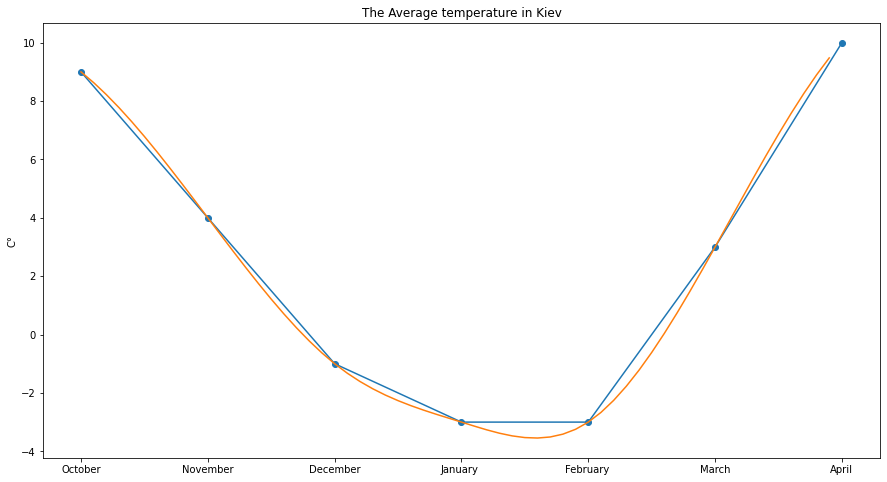

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

plt.figure(figsize=(15, 8))

x = np.array(range(7))
y = np.array([9,4,-1,-3,-3,3,10])
x_data = np.arange(0,6,step=0.1)

# ,fill_value='extrapolate'
inte = interpolate.interp1d(x,y,kind='cubic')

plt.plot(x,y)
plt.scatter(x,y)
plt.plot(x_data,inte(x_data))
ax = plt.gca() 
ax.set_ylabel('C°')
ax.set_title('The Average temperature in Kiev')
plt.xticks(x,['October','November','December','January ','February ','March','April'])


Again, ~~using my favorite function so far~~ interpolation will extend the data set for more smoothness and kind of value prediction.


And trivial task, merge the graph of Kiev temperature and COP over temperature hopefully one can see the dependency.


***

Remark not trivial at all, I spend 40 minutes to figure out why the floats are not comparing normally and how the arrays in numpy are working -_- 
***

([<matplotlib.axis.XTick at 0x7fdaae45ced0>,
 [Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December'),
  Text(0, 0, 'January '),
  Text(0, 0, 'February '),
  Text(0, 0, 'March'),
  Text(0, 0, 'April')])

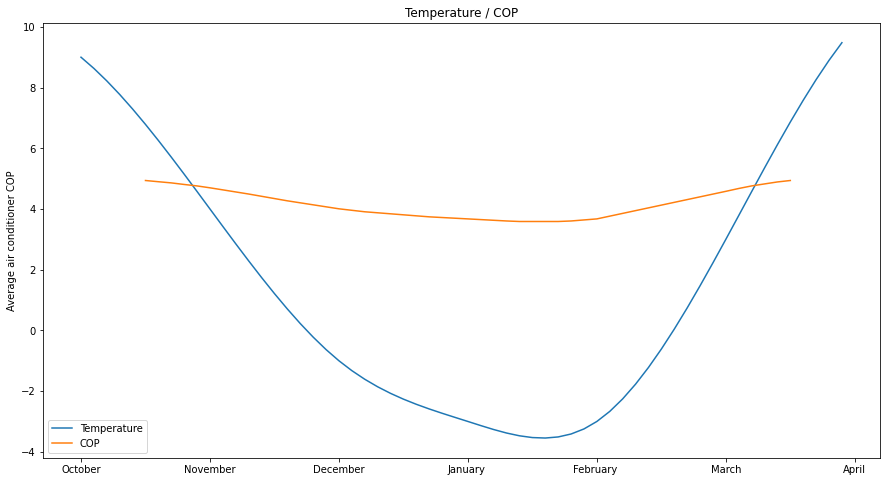

In [14]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp, linspace
from scipy import interpolate
import math

plt.figure(figsize=(15, 8))

x = np.array(range(7))
y = np.array([9,4,-1,-3,-3,3,10])
x_data = np.arange(0,6,step=0.1)


x1 = np.array([-30,-25,-15,-7,7])
y1 = np.array([1.53,1.75,2.04,3.25,4.93])
y2 = np.array([1.21,1.41,2.07,3.30,5.07])
y3 = np.array([1.49,1.54,1.59,2.41,4.85])

x_data1 = np.arange(-30,7,step=0.1)


def avrg(x1,x2,x3):
    return (x1+x2+x3)/3

inte1 = interpolate.interp1d(x1,y1,kind='cubic')
inte2 = interpolate.interp1d(x1,y2,kind='cubic')
inte3 = interpolate.interp1d(x1,y3,kind='cubic')

x_line = x_data1
y1_line1 = inte1(x_data1)
y1_line2 = inte2(x_data1)
y1_line3 = inte3(x_data1)

y1_avrg = avrg(y1_line1,y1_line2,y1_line3)



def transfer(x1,y1,x2,y2):

  outx = np.array([1])
  outy = np.array([1])
  for nub in range(x1.size):
    for nub2 in range(x2.size):
      if math.isclose(y1[nub],x2[nub2],rel_tol=0.01): #y1[nub] == x2[nub2]:
        outy = np.append(outy,[y2[nub2]],axis=0)
        outx = np.append(outx,[x1[nub]],axis=0)
        break;
  return outx[1:] ,outy[1:]


inte = interpolate.interp1d(x,y,kind='cubic')

new_plot = transfer(x_data,inte(x_data),x_data1,y1_avrg)


plt.plot(x_data,inte(x_data),)
plt.plot(new_plot[0],new_plot[1])
ax = plt.gca() 
ax.set_ylabel('Average air conditioner COP')
ax.set_title('Temperature / COP')
ax.legend(['Temperature','COP'])
plt.xticks(x,['October','November','December','January ','February ','March','April'])


As the output we received  an air conditioner efficiency graph depending on the month 

Final calculus, will talk about ~~money~~ consumption and optimization. So, let’s plot the graph of W/h consumption for Air conditioner is calculated as power / coefficient, power for the given air conditioner is  2.2, and for underfloor heating was calculated above (564 W/h) The plot :

([<matplotlib.axis.XTick at 0x7fdaa15ce2d0>,
 [Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December'),
  Text(0, 0, 'January '),
  Text(0, 0, 'February '),
  Text(0, 0, 'March'),
  Text(0, 0, 'April')])

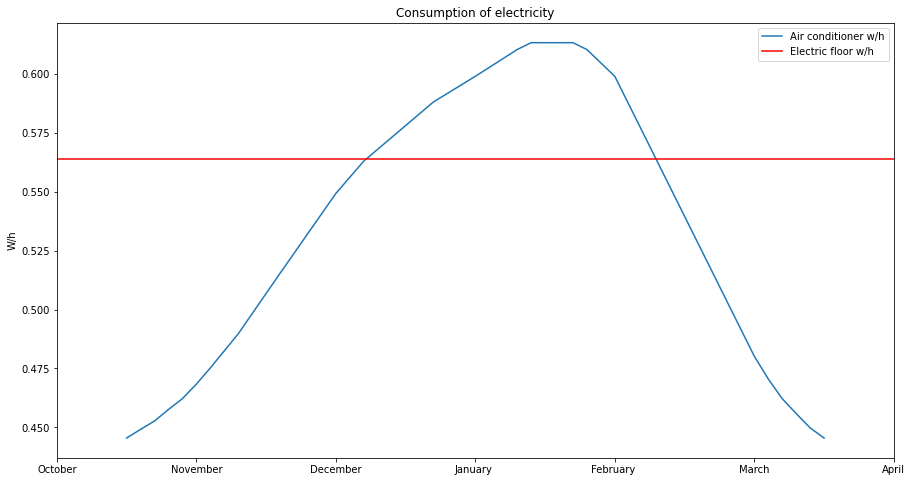

In [12]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp, linspace
from scipy import interpolate
import math

plt.figure(figsize=(15, 8))

x = np.array(range(7))
y = np.array([9,4,-1,-3,-3,3,10])
x_data = np.arange(0,6,step=0.1)


x1 = np.array([-30,-25,-15,-7,7])
y1 = np.array([1.53,1.75,2.04,3.25,4.93])
y2 = np.array([1.21,1.41,2.07,3.30,5.07])
y3 = np.array([1.49,1.54,1.59,2.41,4.85])

x_data1 = np.arange(-30,7,step=0.1)


def avrg(x1,x2,x3):
    return (x1+x2+x3)/3

inte1 = interpolate.interp1d(x1,y1,kind='cubic')
inte2 = interpolate.interp1d(x1,y2,kind='cubic')
inte3 = interpolate.interp1d(x1,y3,kind='cubic')

x_line = x_data1
y1_line1 = inte1(x_data1)
y1_line2 = inte2(x_data1)
y1_line3 = inte3(x_data1)

y1_avrg = avrg(y1_line1,y1_line2,y1_line3)



def transfer(x1,y1,x2,y2):

  outx = np.array([1])
  outy = np.array([1])
  for nub in range(x1.size):
    for nub2 in range(x2.size):
      if math.isclose(y1[nub],x2[nub2],rel_tol=0.01): #y1[nub] == x2[nub2]:
        outy = np.append(outy,[y2[nub2]],axis=0)
        outx = np.append(outx,[x1[nub]],axis=0)
        break;
  return outx[1:] ,outy[1:]

def normalWToCOP (x):
  return 2.2/x

inte = interpolate.interp1d(x,y,kind='cubic')

new_plot = transfer(x_data,inte(x_data),x_data1,y1_avrg)


plt.plot(new_plot[0],normalWToCOP(new_plot[1]))
plt.axhline(y=0.564,color='r')
ax = plt.gca() 
ax.set_ylabel('W/h')
ax.set_title('Consumption of electricity')
ax.legend(['Air conditioner w/h','Electric floor w/h'])
plt.xticks(x,['October','November','December','January ','February ','March','April'])



And by using the dirty trick named “I have a plot” I can calculate using ~~lazy-ass-machine~~ numerical method:



Non-optimized (Air conditioner):
1433.82
Non-optimized (Underfloor heat):
1502.5
Optimized (Combined):
1075.11
Non-optimized (Air conditioner) in hryvnas:
2408.8176
Non-optimized (Underfloor heat) in hryvnas:
2524.2
Optimized (Combined) in hryvnas:
1806.1847999999998
Savings in hryvnas:
718.0152


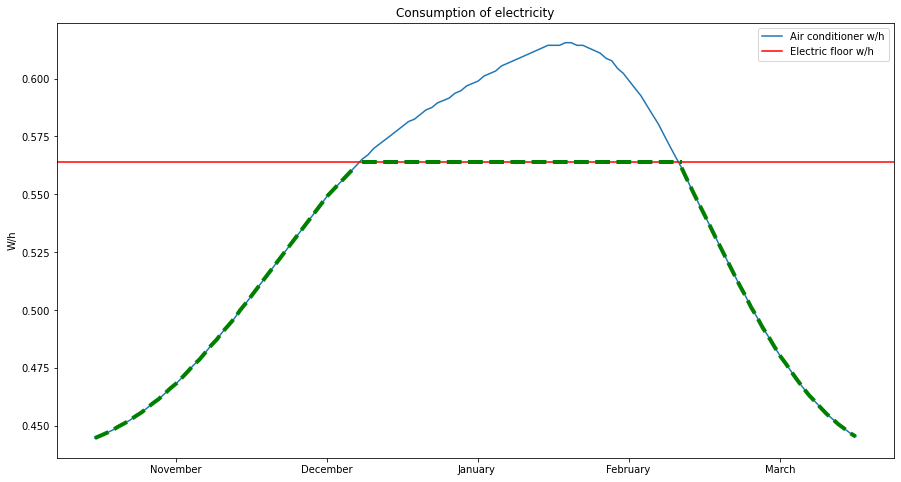

In [42]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp, linspace
from scipy import interpolate
import math

plt.figure(figsize=(15, 8))

x = np.array(range(7))
y = np.array([9,4,-1,-3,-3,3,10])
x_data = np.arange(0,6,step=0.03846)


x1 = np.array([-30,-25,-15,-7,7])
y1 = np.array([1.53,1.75,2.04,3.25,4.93])
y2 = np.array([1.21,1.41,2.07,3.30,5.07])
y3 = np.array([1.49,1.54,1.59,2.41,4.85])

x_data1 = np.arange(-30,7,step=0.03846)


def avrg(x1,x2,x3):
    return (x1+x2+x3)/3

inte1 = interpolate.interp1d(x1,y1,kind='cubic')
inte2 = interpolate.interp1d(x1,y2,kind='cubic')
inte3 = interpolate.interp1d(x1,y3,kind='cubic')

x_line = x_data1
y1_line1 = inte1(x_data1)
y1_line2 = inte2(x_data1)
y1_line3 = inte3(x_data1)

y1_avrg = avrg(y1_line1,y1_line2,y1_line3)



def transfer(x1,y1,x2,y2):

  outx = np.array([1])
  outy = np.array([1])
  for nub in range(x1.size):
    for nub2 in range(x2.size):
      if math.isclose(y1[nub],x2[nub2],rel_tol=0.01): #y1[nub] == x2[nub2]:
        outy = np.append(outy,[y2[nub2]],axis=0)
        outx = np.append(outx,[x1[nub]],axis=0)
        break;
  return outx[1:] ,outy[1:]

def normalWToCOP (x):
  return 2.2/x

inte = interpolate.interp1d(x,y,kind='cubic')

new_plot = transfer(x_data,inte(x_data),x_data1,y1_avrg)


COP_line_x = new_plot[0]
COP_line_y = normalWToCOP(new_plot[1])

plt.plot(COP_line_x,COP_line_y)
plt.axhline(y=0.564,color='r')
ax = plt.gca() 
ax.set_ylabel('W/h')
ax.set_title('Consumption of electricity')
ax.legend(['Air conditioner w/h','Electric floor w/h'])
plt.xticks(x,['October','November','December','January ','February ','March','April'])

passed = False

border1 = 0
border2 = 0
for nub in range(COP_line_x.size):
  if not passed: 
    if COP_line_y[nub] > 0.564:
      border1 = nub
      passed = True
  if passed:
     if COP_line_y[nub] < 0.564:
      border2 = nub
      break
# 11 ,19
plt.plot(COP_line_x[:border1],COP_line_y[:border1],"--", color='g',linewidth=4.0)
plt.plot(COP_line_x[border2:],COP_line_y[border2:],"--", color='g',linewidth=4.0)
plt.plot([COP_line_x[border1],COP_line_x[border2]],[0.564,0.564],"--",color='g',linewidth=4.0)

sum1 = 0
sum = 0
sum2 = 0
for nub in range(COP_line_x.size):
  sum += 24*COP_line_y[nub]

for nub in range(COP_line_x.size):
  sum2 += 24*0.564
 
for nub in range(border1):
  sum1 += 24*COP_line_y[nub]

for numb in range(border1,border2):
  sum1 += 24*0.564

for nub in range(border2,COP_line_x[border2:].size):
  sum1 += 24*COP_line_y[nub]
# print(COP_line_x.size)
print("Non-optimized (Air conditioner):")
print(round(sum,2))
print("Non-optimized (Underfloor heat):")
print(round(sum2,2))
print("Optimized (Combined):")
print(round(sum1,2))
print("Non-optimized (Air conditioner) in hryvnas:")
print(round(sum,2)*1.68)
print("Non-optimized (Underfloor heat) in hryvnas:")
print(round(sum2,2)*1.68)
print("Optimized (Combined) in hryvnas:")
print(round(sum1,2)*1.68)
print("Savings in hryvnas:")
print(round(sum2,2)*1.68 - round(sum1,2)*1.68)

Some additional changes: I spited the graph to days(111 day, but in fact should be a bit more but I will neglect this small issue) so in total we have 1806 kW which definitely seems a bit small number, but i guess it



Non-optimized (Air conditioner):
1433.82

Non-optimized (Underfloor heat):
1502.5

Optimized (Combined):
1075.11

Non-optimized (Air conditioner) in hryvnas:
2408.8176

Non-optimized (Underfloor heat) in hryvnas:
2524.2

Optimized (Combined) in hryvnas:
1806.1847999999998

Savings in hryvnas:
718.0152

The results of optimization are self-explanatory I guess I and not needed in extra explanation. So, as I can surmise and one can observe from results, the modeling of data (using function fir or simply the interpolation for gaps-filling) combined with the optimization methods and analysis can be extremely efficient in almost every situation (where math or data analysis can be applied).
*** 
From my side, I enjoyed this small trip to data analysis even despite some troubles in implementation of task and I hope that I will use this experience and knowledge in my further life at least sometimes)).

### Bibliography(data sources used):

[1] https://prostoteplo.com/faq/potreblenie-energii.html

[2] https://hotline.ua/remont-nagrevatelnye-kabeli/nexans-txlp2r-210017-1237m/?tab=about

[3] https://domikelectrica.ru/otoplenie-doma-kondicionerom/

[4] https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html

[5] https://world-weather.ru/archive/ukraine/kyiv/

[6] https://vsekondicioneri.ru/blog/skolko-elektroenergii-potreblyaet-konditsioner-kak-snizit-raskhody/
